In [33]:

# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter  # Import PercentFormatter
import seaborn as sns
from datetime import datetime
from time import time
import warnings
warnings.filterwarnings("ignore")
import os
from scipy import stats

from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [2]:
# Import data: https://archive.ics.uci.edu/dataset/2/adult

# Fetch the dataset
adult = pd.read_csv("adult.csv")
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#
# Data information
# 3 columns with null values to be treated

print(adult.info())
adult.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


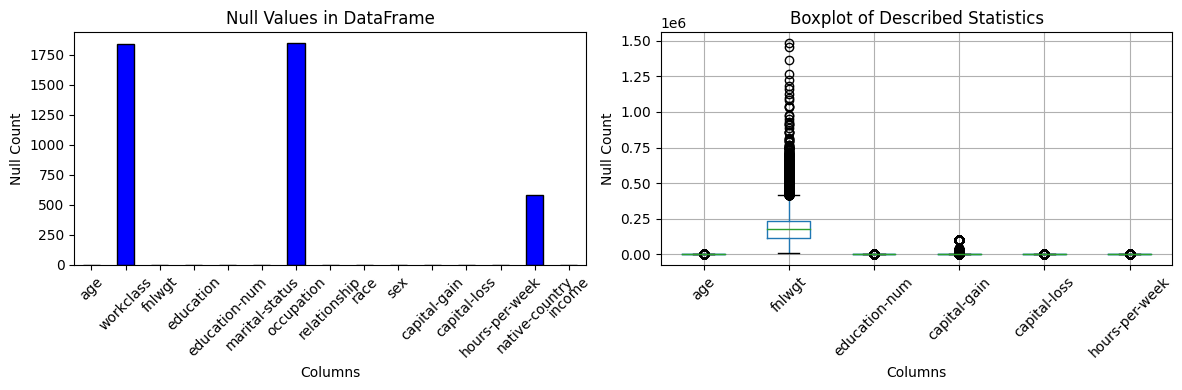

In [4]:

# Null data visualization

# Create a bar plot for null values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# plt.figure(figsize=(8, 6))
adult.isna().sum().plot(kind='bar', color='b', edgecolor='black',ax=axes[0])
# plt.title('Null Values in DataFrame')
# plt.xlabel('Columns')
# plt.ylabel('Null Count')
# plt.xticks(rotation=45)
axes[0].set_title('Null Values in DataFrame')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Null Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


# Create boxplot for numerical data
numerical_df = adult.select_dtypes(include=int)
# plt.figure(figsize=(10, 6))
numerical_df.boxplot(ax=axes[1])
axes[1].set_title('Boxplot of Described Statistics')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Null Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
# plt.set_title('Boxplot of Described Statistics')
# plt.ylabel('Value')
# plt.xticks(rotation=45)a
plt.tight_layout()

plt.show()


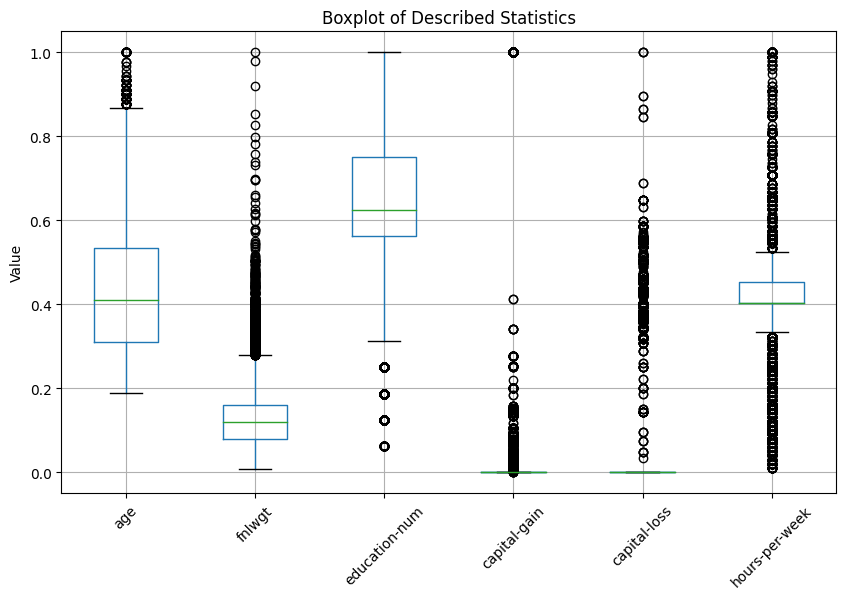

In [5]:
# We can see that the boxplot's visualization is bad due to 
# fnlwgt, with much greater values and more extreme outliers
# NORMALIZAÇÃO [0,1]

for col, max_val in numerical_df.max().items():
    numerical_df[col] /= max_val
plt.figure(figsize=(10, 6))
numerical_df.boxplot()
plt.title('Boxplot of Described Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Conclusions: education and age are far more sparse, whereas capital gain/loss and hours per week are have a clear concentration


In [6]:
adult = adult.apply(lambda x:x.fillna(x.value_counts().index[0]))
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


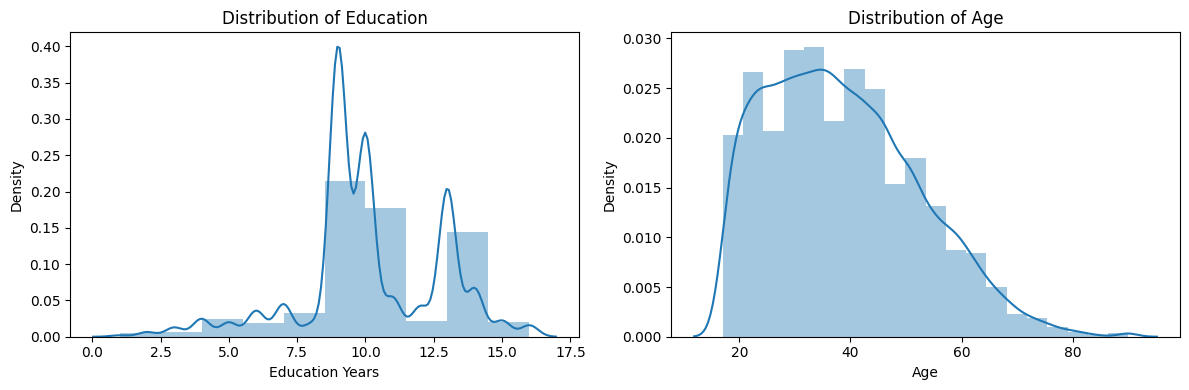

In [7]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first distribution on the left subplot
sns.distplot(adult['education-num'], bins=10, ax=axes[0])
axes[0].set_title('Distribution of Education')
axes[0].set_xlabel('Education Years')
axes[0].set_ylabel('Density')

# Plot the second distribution on the right subplot
sns.distplot(adult['age'], bins=20, ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()


In [8]:

# Calculate common statistical metrics
data = adult.age
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
std_dev = np.std(data)
variance = np.var(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)


# Display the metrics in a table format
print("===== Statistical Metrics - Age =====")
print("---------------------")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode.mode} (with frequency {mode.count})")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

===== Statistical Metrics - Age =====
---------------------
Mean: 38.58164675532078
Median: 37.0
Mode: 36 (with frequency 898)
Standard Deviation: 13.640223092304275
Variance: 186.05568600783081
Skewness: 0.5587176292398571
Kurtosis: -0.16628621434407442


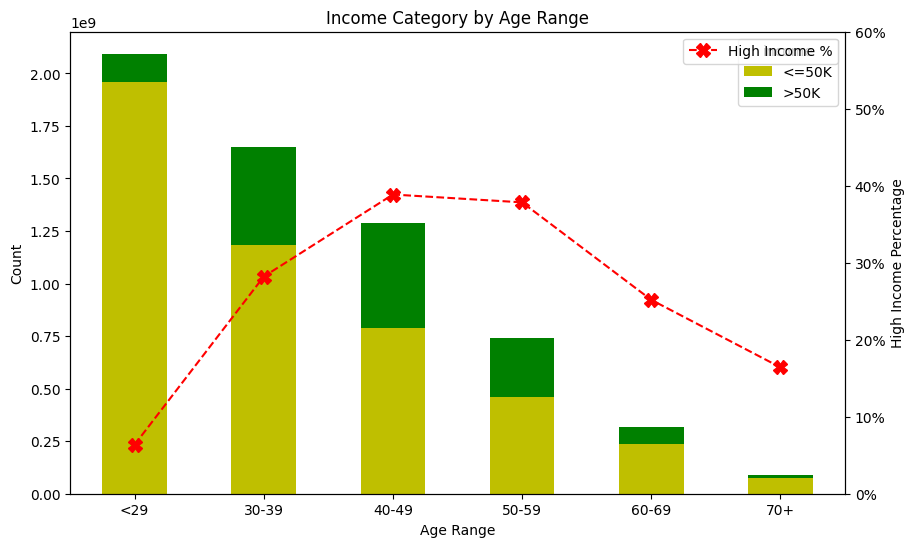

In [9]:
# Age x income relationship
# Define age ranges
bins = [10, 30, 40, 50, 60, 70,1000]  # Adjust as needed
age_ranges = ['<29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column 'age_range' based on age bins
adult['age_range'] = pd.cut(adult['age'], bins=bins, labels=age_ranges)

grouped = adult.groupby(['age_range', 'income']).fnlwgt.agg('sum').unstack().fillna(0)
grouped['Percentage'] = grouped['>50K'] / (grouped['<=50K']+grouped['>50K'])

# Create a stacked bar chart
ax1 = grouped.drop('Percentage', axis=1).plot(kind='bar', stacked=True, color=['y', 'g'], figsize=(10, 6))

# Customize the plot
plt.title('Income Category by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the second y-axis for High income percentage
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['Percentage'], marker='X', markersize=10, color='red', linestyle='--', label='High Income %')

# Customize the second y-axis
ax2.set_ylabel('High Income Percentage')
ax2.set_ylim(0, 0.6)  # Set the y-axis limits between 0% and 60%
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.legend(loc='upper right')

# Show the plot
plt.show()


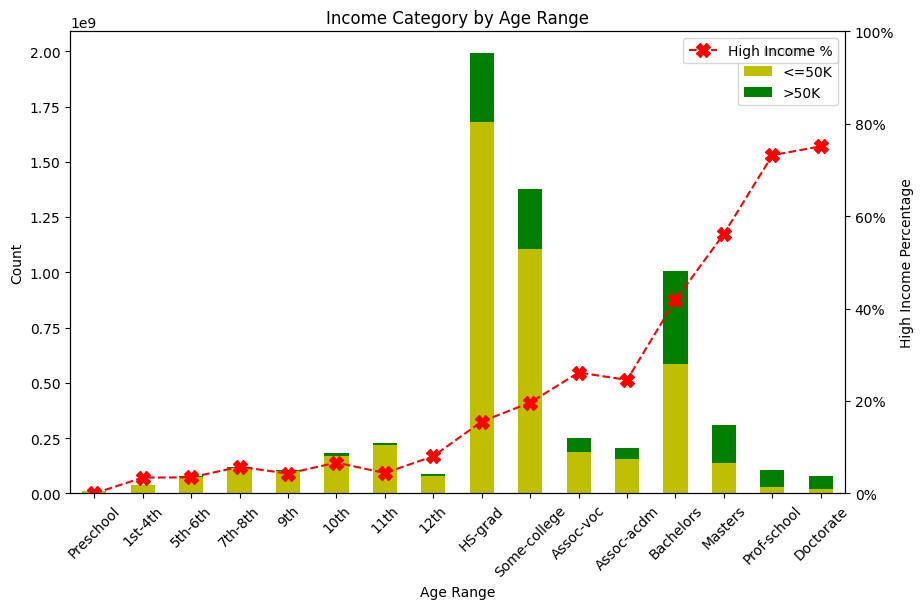

In [10]:
# Education x income relationship

custom_order = adult.groupby('education')['education-num'].agg('mean').sort_values().index
grouped = adult.groupby(['education', 'income']).fnlwgt.agg('sum').unstack().fillna(0)
grouped['Percentage'] = grouped['>50K'] / (grouped['<=50K']+grouped['>50K'])
grouped = grouped.reindex(custom_order)
# Create a stacked bar chart
ax1 = grouped.drop('Percentage', axis=1).plot(kind='bar', stacked=True, color=['y', 'g'], figsize=(10, 6))

# Customize the plot
plt.title('Income Category by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Add the second y-axis for High income percentage
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['Percentage'], marker='X', markersize=10, color='red', linestyle='--', label='High Income %')

# Customize the second y-axis
ax2.set_ylabel('High Income Percentage')
ax2.set_ylim(0, 1)  # Set the y-axis limits between 0% and 60%
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.legend(loc='upper right')

# Show the plot
plt.show()


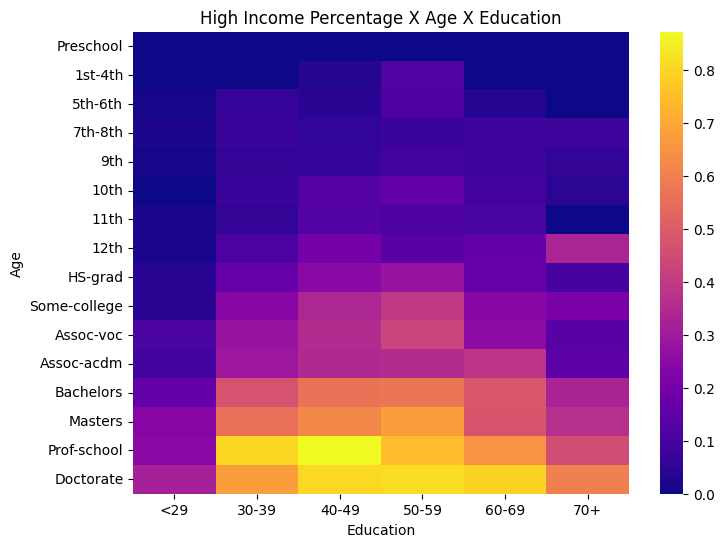

In [11]:

# Heatmap education x 

rich = adult[adult.income=='>50K']
freq_rich = pd.crosstab(rich.education, rich.age_range).fillna(0)
freq_total = pd.crosstab(adult.education, adult.age_range).fillna(0)
freq_percent = freq_rich / freq_total
freq_percent = freq_percent.fillna(0).reindex(custom_order)

plt.figure(figsize=(8, 6))
sns.heatmap(freq_percent, annot=False, cmap='plasma')

# Customize the plot
plt.title('High Income Percentage X Age X Education')
plt.xlabel('Education')
plt.ylabel('Age')

# Show the heatmap
plt.show()

 

In [12]:
adult.drop('age_range', axis=1, inplace=True)

In [13]:
categorical_cols = adult.select_dtypes(include=object).columns
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [14]:
for col in categorical_cols:
    print(adult[col].value_counts())

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [15]:
col = 'native-country'
vc = pd.DataFrame(adult[col].value_counts())
vc['%'] = vc.cumsum()
vc['%'] = vc['%'] / vc['%'].iloc[-1]
vc

,count,%
native-country,,
United-States,29753,0.913762
Mexico,643,0.933509
Philippines,198,0.939590
Germany,137,0.943798
Canada,121,0.947514
Puerto-Rico,114,0.951015
El-Salvador,106,0.954270
India,100,0.957342
Cuba,95,0.960259


In [16]:
to_group = list(vc[vc['count']<50].index)
for country in to_group:
    adult[col] = adult[col].replace(country, 'Other')
adult[col].value_counts()

native-country
United-States         29753
Mexico                  643
Other                   462
Philippines             198
Germany                 137
Canada                  121
Puerto-Rico             114
El-Salvador             106
India                   100
Cuba                     95
England                  90
Jamaica                  81
South                    80
China                    75
Italy                    73
Dominican-Republic       70
Vietnam                  67
Guatemala                64
Japan                    62
Poland                   60
Columbia                 59
Taiwan                   51
Name: count, dtype: int64

In [17]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [18]:
col = 'marital-status'
vc = pd.DataFrame(adult[col].value_counts())
vc['%'] = vc.cumsum()
vc['%'] = vc['%'] / vc['%'].iloc[-1]
vc

,count,%
marital-status,,
Married-civ-spouse,14976,0.459937
Never-married,10683,0.788029
Divorced,4443,0.924480
Separated,1025,0.955960
Widowed,993,0.986456
Married-spouse-absent,418,0.999294
Married-AF-spouse,23,1.000000


In [19]:
adult[col] = adult[col].apply(lambda x: 1 if 'Married' in x else 0)
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,1,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,1,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,0,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,0,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
col = 'race'
vc = pd.DataFrame(adult[col].value_counts())
vc['%'] = vc.cumsum()
vc['%'] = vc['%'] / vc['%'].iloc[-1]
vc

,count,%
race,,
White,27816,0.854274
Black,3124,0.950217
Asian-Pac-Islander,1039,0.982126
Amer-Indian-Eskimo,311,0.991677
Other,271,1.000000


In [21]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [22]:
binary_cols = [x for x in adult.columns if adult.nunique().loc[x]<=2]
categorical_cols = [x for x in categorical_cols if x not in binary_cols]

labelEncoder = preprocessing.LabelEncoder()
for col in binary_cols:
    adult[col] = labelEncoder.fit_transform(adult[col])

cat_to_num_df = pd.DataFrame()
for col in categorical_cols:
    encoded_df = pd.get_dummies(adult[col]).add_prefix(f"{col}_")
    cat_to_num_df = pd.concat([cat_to_num_df, encoded_df], axis = 1)
    adult = adult.drop(col, axis=1)

for col in cat_to_num_df.columns:
    cat_to_num_df[col] = cat_to_num_df[col].astype(float)

adult = pd.concat([adult, cat_to_num_df], axis=1)
adult

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,...,native-country_Japan,native-country_Mexico,native-country_Other,native-country_Philippines,native-country_Poland,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_United-States,native-country_Vietnam
0,39,77516,13,0,1,2174,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,1,1,0,0,13,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,234721,7,1,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,338409,13,1,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,0,38,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32557,40,154374,9,1,1,0,0,40,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32558,58,151910,9,0,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,22,201490,9,0,1,0,0,20,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X,y = adult.drop('income', axis=1), adult['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(24420, 79)

In [25]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [26]:
svc.score(X_test, y_test)

0.7976907013880359

In [27]:
svc.score(X_train, y_train)

0.7934889434889435

In [28]:
param_grid = {
    'C': [1, 10, 100],
    'gamma': [1, 0.001, 0.0001, 'auto'],
    'kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(estimator=SVC(), 
                          param_grid=param_grid, verbose=10)

In [29]:
# grid_search.fit(X_train,y_train)

In [35]:
# Make predictions on the test data
Y_Pred = svc.predict(X_test)

# Convert predicted probabilities to binary predictions
Y_Pred_Binary = (Y_Pred > 0.5)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_Pred_Binary))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, Y_Pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6212
           1       0.99      0.15      0.26      1929

    accuracy                           0.80      8141
   macro avg       0.89      0.57      0.57      8141
weighted avg       0.84      0.80      0.73      8141

AUC: 0.5736310046576185


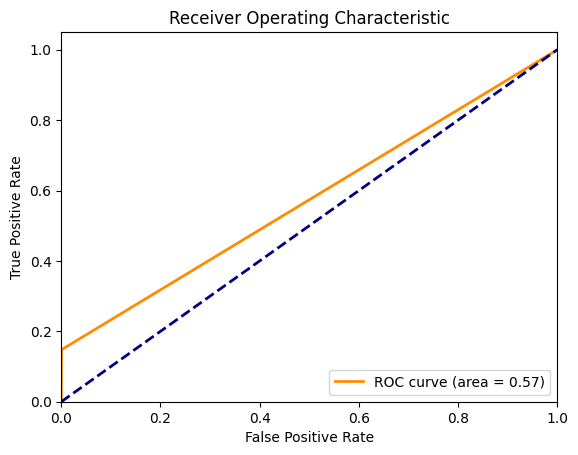

In [36]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

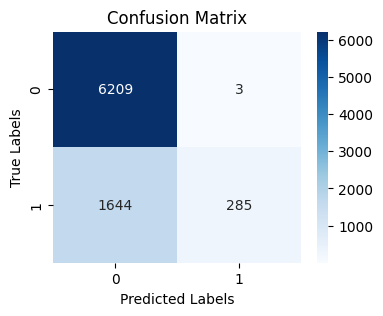

In [37]:
conf_matrix = confusion_matrix(y_test, Y_Pred_Binary)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()